In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

# **3. Initial Characteristic Analysis**
---

### **3.1 Load Data**
---

In [2]:
# Import dataset
loan_data = pd.read_csv('train_after_eda.csv')

# Data check
with pd.option_context('display.max_rows', 1000):
    display(loan_data.head().T)

,0,1,2,3,4
loan_amnt,9975.0,5000.0,6000.0,20000.0,16000.0
int_rate,17.57,12.69,16.55,16.59,7.89
grade,D,C,D,D,A
emp_length,1.0,NaN,0.0,0.0,10.0
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,26500.0,30000.0,54000.0,50000.0,87000.0
verification_status,Not Verified,Verified,Verified,Verified,Source Verified
loan_status,1,0,0,0,0
purpose,credit_card,debt_consolidation,moving,debt_consolidation,credit_card
addr_state,CA,WA,KS,NY,CO


In [3]:
# Set response variable
response_variable = 'loan_status'

Numerical dan categorical characteristics.

In [4]:
# Numerical characteristics
num_columns = ['emp_length', 'annual_inc', 'loan_amnt', 'int_rate', 'dti', 'fico_range_low', 'open_acc', 
               'revol_util', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
               'num_rev_tl_bal_gt_0', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'revol_bal']

In [5]:
# Categorical characteristics
cat_columns = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'application_type', 'grade', 'initial_list_status',
               'pub_rec', 'pub_rec_bankruptcies', 'delinq_2yrs', 'mort_acc']

### **3.2 Characteristic Binning**
---

Function to binning numerical characteristics

In [6]:
# Create function for binning numerical characteristics
def create_binning(data, characteristic, num_of_bins):
    """
    Function for binning numerical characteristics

    Parameters
    ----------
    data: array like
        The dataset
    
    characteristic: object
        List of characteristics
    
    num_of_bins: integer
        The number of bins

    Returns
    -------
    data: array like
        Final dataset
    
    bins: array like
        Bins result of qcut
    """  
    data[characteristic + '_bin'], bins = pd.qcut(data[characteristic],
                                                  q = num_of_bins,
                                                  retbins = True)
    
    return data, bins

* `emp_length` has Q3 and max value at 10, thus we will create 3 bins.
* `pub_rec`, `pub_rec_bankruptcies`, `delinq_2yrs`, `mort_acc` will be treated as categorical characteristics.

In [7]:
# Numerical characteristics without emp_length, pub_rec, pub_rec_bankruptcies, delinq_2yrs
num_columns_4bin = ['annual_inc', 'loan_amnt', 'int_rate', 'dti', 'fico_range_low', 'open_acc', 
                    'revol_util', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
                    'num_rev_tl_bal_gt_0', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'revol_bal']

In [8]:
# Create binning column for numerical characteristics
bin_list = []

for column in num_columns_4bin:
    loan_data_binned, bins_ = create_binning(data = loan_data,
                                             characteristic = column, 
                                             num_of_bins = 4)
    
    bin_list.append(bins_)

In [9]:
# Create binning for emp_length with 3 bin only (since Q3 and max value 10)
loan_data_binned['emp_length_bin'] = pd.cut(loan_data['emp_length'],
                                            bins = [-0.001, 2., 6., 10.])

In [10]:
# Drop numerical columns before binning 'missing' value
loan_data_binned = loan_data_binned.drop(columns = num_columns,
                                         axis = 1)

In [11]:
# Check the new data
loan_data_binned.head().T

,0,1,2,3,4
grade,D,C,D,D,A
home_ownership,RENT,RENT,RENT,RENT,RENT
verification_status,Not Verified,Verified,Verified,Verified,Source Verified
loan_status,1,0,0,0,0
purpose,credit_card,debt_consolidation,moving,debt_consolidation,credit_card
addr_state,CA,WA,KS,NY,CO
delinq_2yrs,0.0,0.0,0.0,0.0,0.0
pub_rec,1.0,0.0,0.0,0.0,0.0
initial_list_status,w,w,w,f,w
application_type,Individual,Individual,Individual,Individual,Individual


Check missing value

In [12]:
# Check missing value
loan_data_binned.isnull().sum()

grade                           0
home_ownership                  0
verification_status             0
loan_status                     0
purpose                         0
addr_state                      0
delinq_2yrs                     0
pub_rec                         0
initial_list_status             0
application_type                0
mort_acc                    26340
pub_rec_bankruptcies          915
annual_inc_bin                  0
loan_amnt_bin                   0
int_rate_bin                    0
dti_bin                         0
fico_range_low_bin              0
open_acc_bin                    0
revol_util_bin                253
num_bc_tl_bin               38010
num_il_tl_bin               38010
num_op_rev_tl_bin           38010
num_rev_accts_bin           38011
num_rev_tl_bal_gt_0_bin     38010
mo_sin_old_il_acct_bin      52974
mo_sin_old_rev_tl_op_bin    38011
revol_bal_bin                   0
emp_length_bin              25325
dtype: int64

In [13]:
# Define columns with missing value on numerical
missing_columns = ['revol_util_bin', 'num_bc_tl_bin', 'num_il_tl_bin', 'num_op_rev_tl_bin', 'num_rev_accts_bin',
                   'num_rev_tl_bal_gt_0_bin', 'mo_sin_old_il_acct_bin', 'mo_sin_old_rev_tl_op_bin', 
                   'emp_length_bin']

In [14]:
# Replace missing values with 'missing'
for column in missing_columns:
    loan_data_binned[column] = loan_data_binned[column].cat.add_categories('missing')

    loan_data_binned[column].fillna(value = 'missing',
                                     inplace = True)

In [15]:
# Fill null value on 'pub_rec_bankruptcies' with 'missing'
loan_data_binned['pub_rec_bankruptcies'].fillna(value = 'missing',
                                                inplace = True)

In [16]:
# Fill null value on 'mort_acc' with 'missing'
loan_data_binned['mort_acc'].fillna(value = 'missing',
                                    inplace = True)

In [17]:
# Check missing value
loan_data_binned.isnull().sum()

grade                       0
home_ownership              0
verification_status         0
loan_status                 0
purpose                     0
addr_state                  0
delinq_2yrs                 0
pub_rec                     0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
annual_inc_bin              0
loan_amnt_bin               0
int_rate_bin                0
dti_bin                     0
fico_range_low_bin          0
open_acc_bin                0
revol_util_bin              0
num_bc_tl_bin               0
num_il_tl_bin               0
num_op_rev_tl_bin           0
num_rev_accts_bin           0
num_rev_tl_bal_gt_0_bin     0
mo_sin_old_il_acct_bin      0
mo_sin_old_rev_tl_op_bin    0
revol_bal_bin               0
emp_length_bin              0
dtype: int64

### **3.3 WoE and IV**
---

In [18]:
crosstab_num = []

# Create crosstab for numerical characteristics
for column in num_columns:
    crosstab = pd.crosstab(loan_data_binned[column + '_bin'],
                           loan_data_binned[response_variable],
                           margins = True)

    crosstab_num.append(crosstab)

In [19]:
crosstab_cat = []

# Create crosstab for categorical characteristics
for column in cat_columns:
    crosstab = pd.crosstab(loan_data_binned[column],
                           loan_data_binned[response_variable],
                           margins = True)

    crosstab_cat.append(crosstab)

In [20]:
# Merge the crosstabs
crosstab_list = crosstab_num + crosstab_cat

- WoE or Weight of Evidence is value to measures the strength of each attribute.

$$
\begin{align*}
W_i &= \ln ( \% \text{Good} / \% \text{Bad} ) \\
W_i &= \ln \left ( \left ( \frac{N_i}{\sum N} \right ) / \left ( \frac{P_i}{\sum P} \right )\right ) \\
\end{align*}
$$

- IV or Information Value is value to measures the total strength of the characteristics.

$$
\begin{align*}
IV &= \sum_{i=1}^{n} ( \% \text{Good} - \% \text{Bad} ) \times W_i \\
IV &= \sum_{i=1}^{n}\left [ \left ( \frac{N_i}{\sum N} - \frac{P_i}{\sum P} \right ) \times W_i \right ] \\
\end{align*}
$$

In [21]:
# List for WoE
WoE_list = []

# List for IV
IV_list = []

# Table for IV
IV_table = pd.DataFrame({'Characteristic': [],
                         'Information Value' : []})

for crosstab in crosstab_list:
    # Calculate %Good
    crosstab['p_good'] = crosstab[0]/crosstab[0]['All']
    
    # Calculate %Bad 
    crosstab['p_bad'] = crosstab[1]/crosstab[1]['All']

    # Calculate WoE
    crosstab['WoE'] = np.log(crosstab['p_good']/crosstab['p_bad'])

    # Calculate contribution for IV
    crosstab['contribution'] = (crosstab['p_good'] - crosstab['p_bad'])*crosstab['WoE']

    # Calculate IV
    IV = crosstab['contribution'][:-1].sum()

    add_IV = {'Characteristic': crosstab.index.name,
              'Information Value' : IV}
    
    WoE_list.append(crosstab)
    IV_list.append(add_IV)

In [22]:
# Create initial table to summarize the WOE values
WoE_table = pd.DataFrame({'Characteristic': [],
                          'Attribute': [],
                          'WoE': []})

for i in range(len(crosstab_list)):

  # Define crosstab and reset index
  crosstab = crosstab_list[i].reset_index()

  # Save the characteristic name
  char_name = crosstab.columns[0]

  # Only use two columns (Attribute name and its WOE value)
  # Drop the last row (average/total WOE)
  crosstab = crosstab.iloc[:-1, [0,-2]]
  crosstab.columns = ['Attribute', 'WoE']

  # Add the characteristic name in a column
  crosstab['Characteristic'] = char_name

  WoE_table = pd.concat((WoE_table, crosstab),
                        axis = 0)

  # Reorder the column
  WoE_table.columns = ['Characteristic',
                       'Attribute',
                       'WoE']

WoE_table

,Characteristic,Attribute,WoE
0,emp_length_bin,"(-0.001, 2.0]",-0.024947
1,emp_length_bin,"(2.0, 6.0]",0.010390
2,emp_length_bin,"(6.0, 10.0]",0.084130
3,emp_length_bin,missing,-0.475502
0,annual_inc_bin,"(1769.999, 43000.0]",-0.323845
...,...,...,...
0,mort_acc,0.0,-0.219543
1,mort_acc,1.0,0.031233
2,mort_acc,2.0,0.153774
3,mort_acc,3.0,0.293943


In [23]:
# Add IV list into IV tablee
IV_table = pd.concat([IV_table, pd.DataFrame(IV_list)],
                     ignore_index = True)
IV_table

,Characteristic,Information Value
0,emp_length_bin,0.018770
1,annual_inc_bin,0.065969
2,loan_amnt_bin,0.004210
3,int_rate_bin,0.296732
4,dti_bin,0.048055
5,fico_range_low_bin,0.127545
6,open_acc_bin,0.001039
7,revol_util_bin,0.014105
8,num_bc_tl_bin,0.003368
9,num_il_tl_bin,0.002684


In [24]:
strength = []

# Assign the rule of thumb regarding IV
for iv in IV_table['Information Value']:
    if iv < 0.02:
        strength.append('Unpredictive')
    elif iv >= 0.02 and iv < 0.1:
        strength.append('Weak')
    elif iv >= 0.1 and iv < 0.3:
        strength.append('Medium')
    else:
        strength.append('Strong')

# Assign the strength to each characteristics
IV_table = IV_table.assign(Strength = strength)

# Sort the table by the IV values
IV_table.sort_values(by = 'Information Value')

,Characteristic,Information Value,Strength
20,application_type,0.000004,Unpredictive
6,open_acc_bin,0.001039,Unpredictive
11,num_rev_accts_bin,0.001315,Unpredictive
25,delinq_2yrs,0.002126,Unpredictive
9,num_il_tl_bin,0.002684,Unpredictive
8,num_bc_tl_bin,0.003368,Unpredictive
22,initial_list_status,0.003890,Unpredictive
2,loan_amnt_bin,0.004210,Unpredictive
10,num_op_rev_tl_bin,0.004984,Unpredictive
23,pub_rec,0.006853,Unpredictive


### **3.4 Check Logical Trend**
---

In [25]:
def plot_WoE(crosstab, rot_angle = 20):
    """ 
    Function to plot the WoE trend

    Parameters
    ----------
    crosstab: Dataframe
        Crosstab table of the characteristic
    
    rot_angle: float, default=20
        Rotation angle for xticks of the plot
    """ 
    plt.figure(figsize=(8,4))

    sns.pointplot(x = crosstab.T.columns,
                  y = 'WoE',
                  data = crosstab,
                  markers = 'o',
                  linestyles = '--',
                  color = 'blue')
    
    plt.xticks(rotation = rot_angle)

##### Characteristic 1: `emp_length_bin`

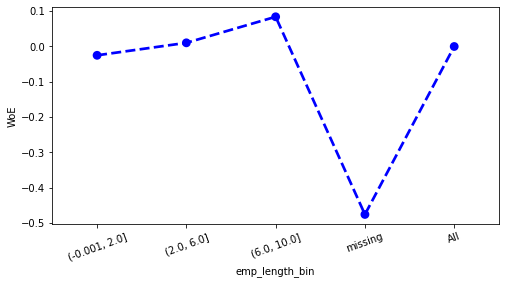

In [26]:
plot_WoE(crosstab_list[0])

- Debtors with longer employment length tend to perform a good loan.
- 'missing' group has tend to perform a bad loan.

##### Characteristic 2: `annual_inc_bin`

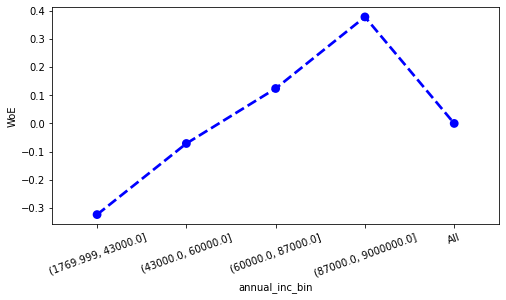

In [27]:
plot_WoE(crosstab_list[1])

- Higher income tend to perform a good loan.

##### Characteristic 3: `loan_amnt_bin`

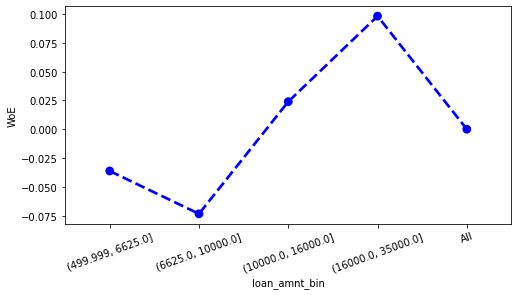

In [28]:
plot_WoE(crosstab_list[2])

- High loan amount tend to perform a good loan (above 10000).
- Low loan amount tend to perform a bad loan (below 10000).

##### Characteristic 4: `int_rate_bin`

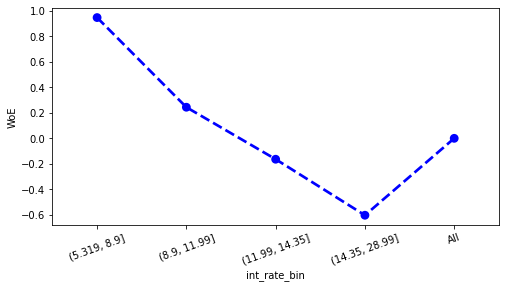

In [29]:
plot_WoE(crosstab_list[3])

- High interest rate tend to perform a bad loan as expected.

##### Characteristic 5: `dti_bin`

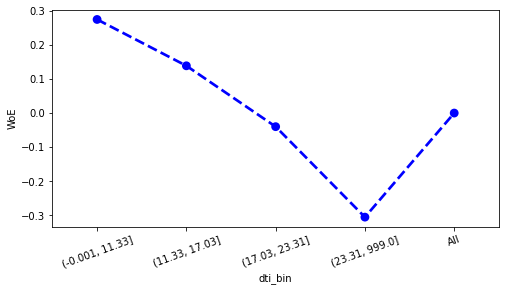

In [30]:
plot_WoE(crosstab_list[4])

- High debt to income ratio tend to perform a bad loan as expected.

##### Characteristic 6: `fico_range_low_bin`

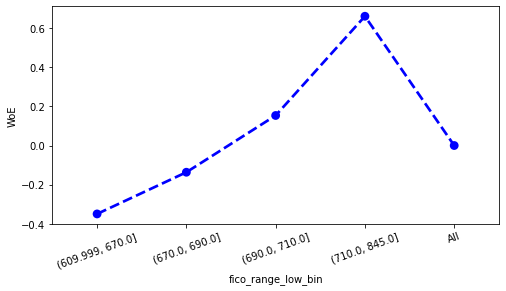

In [31]:
plot_WoE(crosstab_list[5])

- High fico score tend to perform a good loan as expected.

##### Characteristic 7: `open_acc_bin`

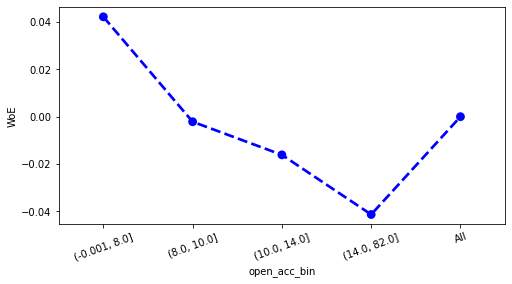

In [32]:
plot_WoE(crosstab_list[6])

- High number of open credit lines in the borrower's credit file tend to perform a bad loan.
- For debtors with less than 8 open credit liners tend to perform a good loan.

##### Characteristic 8: `revol_util`

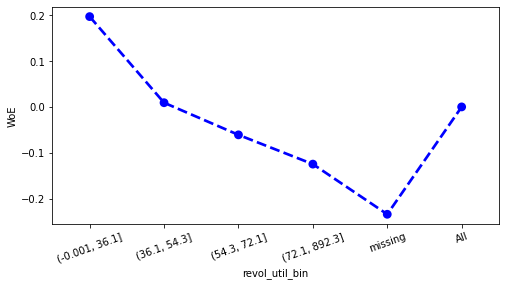

In [33]:
plot_WoE(crosstab_list[7])

- Debtors with high revolving line utilization rate more than 54% tend to perform a bad loan.
- 'missing' group has the worse WoE.

##### Characteristic 9: `num_bc_tl_bin`

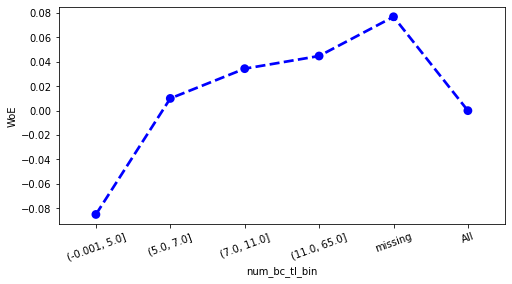

In [34]:
plot_WoE(crosstab_list[8])

- Debtors who have more than 7 bankcard accounts tend to  perform a good loan.
- 'missing' group has the highest WoE.

##### Characteristic 10: `num_il_tl_bin`

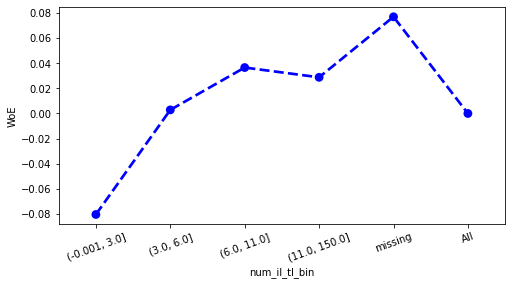

In [35]:
plot_WoE(crosstab_list[9])

-  Debtors who have more than 6 installment accounts tend to perform a good loan.
- 'missing' group has the highest WoE.

##### Characteristic 11: `num_op_rev_tl_bin`

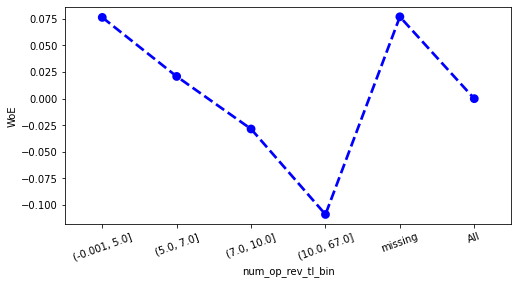

In [36]:
plot_WoE(crosstab_list[10])

- Debtors who have more than 7 open revolving accounts tend to perform a bad loan.
- 'missing' group has high WoE.

##### Characteristic 12: `num_rev_accts_bin`

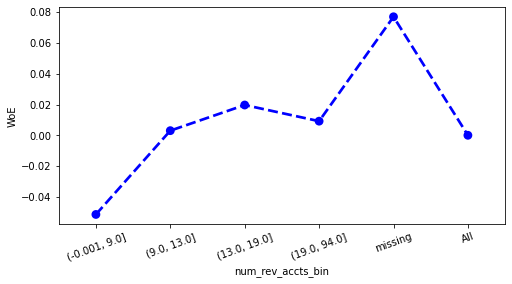

In [37]:
plot_WoE(crosstab_list[11])

- Debtors with less than 9 revolving accounts tend to perform a bad loan.
- Debtors with more than 9 revolving accounts has similar WoE around 0 and 0.02.
- 'missing' group has the highest WoE.

##### Characteristic 13: `num_rev_tl_bal_gt_0_bin`

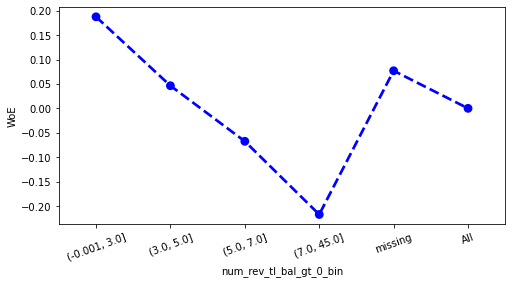

In [38]:
plot_WoE(crosstab_list[12])

- Debtors with more than 5 revolving trades with balance > 0 tend to perform a bad loan.
- 'missing' group has high WoE.

##### Characteristic 14: `mo_sin_old_il_acct_bin`

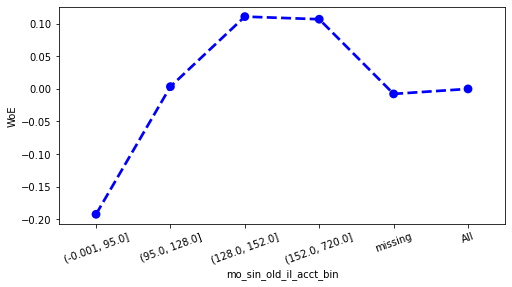

In [39]:
plot_WoE(crosstab_list[13])

- High number of months since oldest bank installment account opened (more than 128) tend to perform a good loan which can be correlated to long employment length.
- Debtors who have 'young' bank installment account (value < 95) tend to perform a bad loan.
- 'missing' group has WoE around 0.

##### Characteristic 15: `mo_sin_old_rev_tl_op_bin`

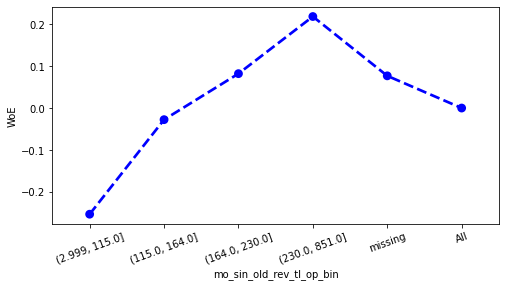

In [40]:
plot_WoE(crosstab_list[14])

- The higher value of months since oldest revolving account opened tend to perform a good loan.
- 'missing' group has high WoE.

##### Characteristic 16: `revol_bal_bin`

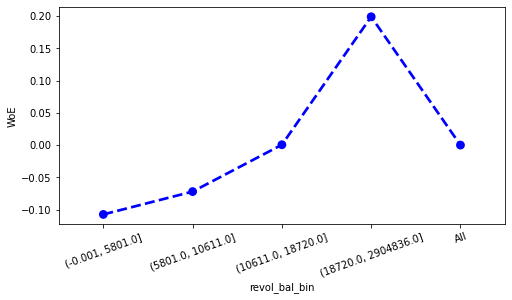

In [41]:
plot_WoE(crosstab_list[15])

- Debtors who have total credit revolving balance more than 18720 tend to perform a good loan.

##### Characteristic 17: `home_ownership`

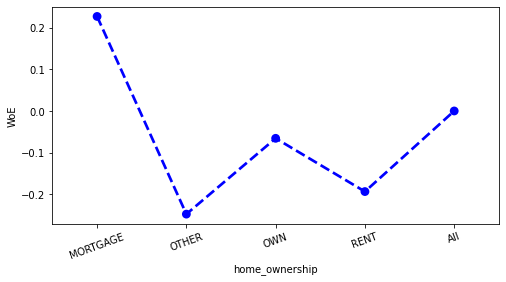

In [42]:
plot_WoE(crosstab_list[16])

- 'MORTGAGE' status on home ownership tend to perform a good loan.
- Other status tend to perform a bad loan.

##### Characteristic 18: `verification_status`

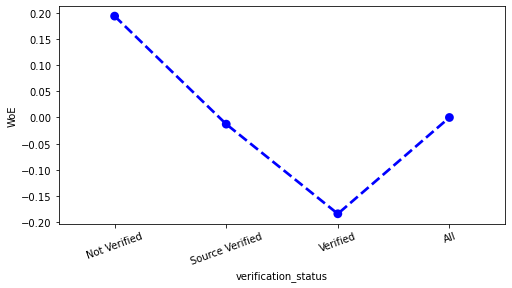

In [43]:
plot_WoE(crosstab_list[17])

- Verified status on income tend to perform a bad loan. This result is not expected.

##### Characteristic 19: `purpose`

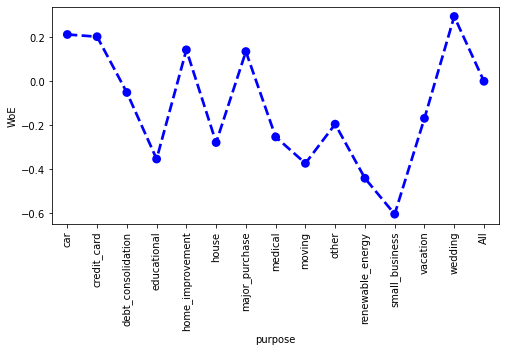

In [44]:
plot_WoE(crosstab_list[18], rot_angle=90)

- There is no pattern of WoE from the purpose. 

##### Characteristic 20: `addr_state`

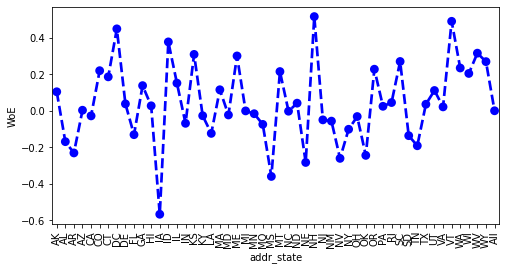

In [45]:
plot_WoE(crosstab_list[19], rot_angle=90)

- There is no pattern of WoE from the address state. 

##### Characteristic 21: `application_type`

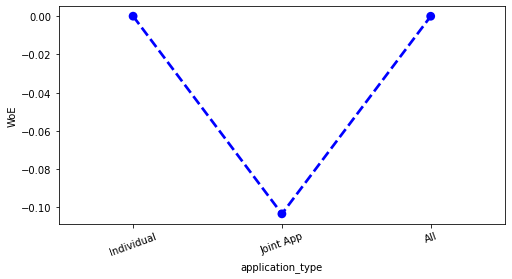

In [46]:
plot_WoE(crosstab_list[20])

- Debtors with joint application tend to perform a bad loan than debtors with individual application.

##### Characteristic 22: `grade`

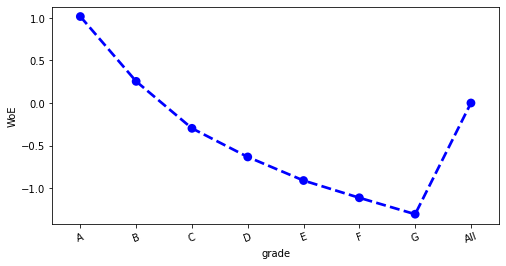

In [47]:
plot_WoE(crosstab_list[21])

- Grade 'A' and 'B' tend to perform a good loan.
- The lower the grade, the lower its WoE.

##### Characteristic 23: `initial_list_status`

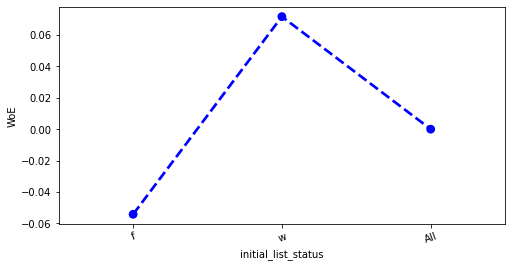

In [48]:
plot_WoE(crosstab_list[22])

- Debtors who initially listed in fractional (f) market tend to perform a bad loan than who initially listed in whole (w) market

##### Characteristic 24: `pub_rec`

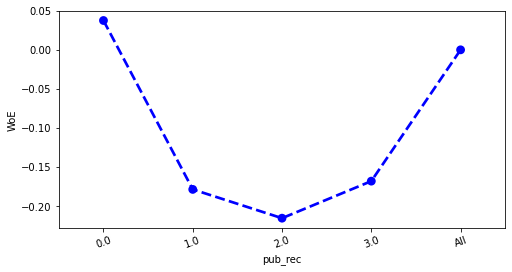

In [49]:
plot_WoE(crosstab_list[23])

- Debtors who have non-zero deragatory public record tend to perform a bad loan as expected.

##### Characteristic 25: `pub_rec_bankruptcies`

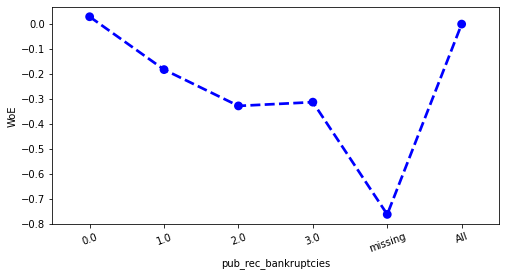

In [50]:
plot_WoE(crosstab_list[24])

- Debtors who have non-zero public record bankruptcies tend to perform a bad loan as expected.
- 'missing' group has worse WoE.

##### Characteristic 26: `delinq_2yrs`

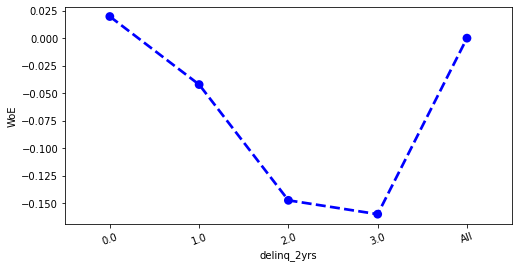

In [51]:
plot_WoE(crosstab_list[25])

- Debtors who have ever past due for the past 2 years tend to perform a bad loan as expected.

##### Characteristic 27: `mort_acc`

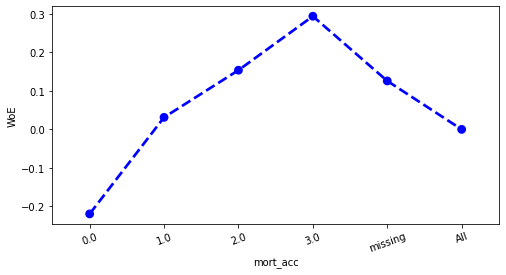

In [52]:
plot_WoE(crosstab_list[26])

- Debtor who have non-zero mortgage accounts tend to perform a bad loan.

### **3.5 Test of Independence**
---

In [53]:
characteristic_list = IV_table['Characteristic']

In [54]:
import scipy.stats as stats 
from scipy.stats import  chi2_contingency

def independence_test(data, characteristic_label, alpha=0.05):
    crosstab = pd.crosstab(data[characteristic_label],
                           data[response_variable],
                           margins =False)

    stats.chi2_contingency(crosstab)

    result = stats.chi2_contingency(crosstab)

    stat = result[0]
    pval = result[1]

    if pval < alpha:
        conclusion = 'Not Independent'
    else:
        conclusion = 'Independent'

    res = pd.DataFrame({'Characteristic': characteristic_label,
                        'Chi-stat': round(stat,2),
                        'P-value': pval,
                        'Conclusion': conclusion},
                        index=[0])

    return res

In [55]:
ind_table = pd.DataFrame({'Characteristic': [],
                          'Chi-stat': [],
                          'P-value': [],
                          'Conclusion': []})

independence_list = []

for characteristic in characteristic_list:
    test_result = independence_test(data = loan_data_binned,
                                    characteristic_label = characteristic,
                                    alpha = 0.05)

    independence_list.append(test_result)
    ind_table = pd.concat([ind_table, test_result],
                          ignore_index = True)

ind_table

,Characteristic,Chi-stat,P-value,Conclusion
0,emp_length_bin,1120.55,1.266379e-242,Not Independent
1,annual_inc_bin,3415.76,0.000000e+00,Not Independent
2,loan_amnt_bin,217.66,6.435542e-47,Not Independent
3,int_rate_bin,14271.92,0.000000e+00,Not Independent
4,dti_bin,2565.04,0.000000e+00,Not Independent
5,fico_range_low_bin,6018.85,0.000000e+00,Not Independent
6,open_acc_bin,54.07,1.085137e-11,Not Independent
7,revol_util_bin,714.07,3.128117e-153,Not Independent
8,num_bc_tl_bin,177.96,2.042312e-37,Not Independent
9,num_il_tl_bin,141.58,1.298280e-29,Not Independent


## **4. Pre-Processing**
---

#### **Pre-Processing Train Set**

In [56]:
# Define raw data train
raw_data_train = loan_data_binned.copy()

In [57]:
characteristic_columns = list(raw_data_train.columns.values)
characteristic_columns = [e for e in characteristic_columns if e not in ('loan_status')]

In [58]:
woe_data_train = raw_data_train.copy()

for column in characteristic_columns:
  woe_data_train[column] = pd.Categorical(values = raw_data_train[column],
                                          ordered = False)

  crosstab = WoE_table[WoE_table['Characteristic'] == column]

  woe_list = crosstab['WoE'].to_list()

  woe_data_train[column] = woe_data_train[column].cat.rename_categories(woe_list)

woe_data_train.T

,0,1,2,3,4,5,6,7,8,9,...,434680,434681,434682,434683,434684,434685,434686,434687,434688,434689
grade,-0.634544,-0.297893,-0.634544,-0.634544,1.016962,0.254458,1.016962,-0.297893,-0.297893,-0.297893,...,1.016962,-0.634544,-0.634544,-0.634544,-0.297893,1.016962,0.254458,-0.297893,-0.297893,1.016962
home_ownership,-0.193928,-0.193928,-0.193928,-0.193928,-0.193928,0.227417,-0.193928,0.227417,-0.193928,0.227417,...,-0.193928,0.227417,-0.193928,-0.193928,-0.065809,-0.065809,-0.065809,0.227417,-0.193928,-0.193928
verification_status,0.193203,-0.183572,-0.183572,-0.183572,-0.012694,0.193203,-0.012694,0.193203,0.193203,0.193203,...,-0.183572,-0.183572,-0.012694,-0.012694,-0.012694,-0.012694,-0.012694,-0.183572,0.193203,0.193203
loan_status,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
purpose,0.202815,-0.050903,-0.373146,-0.050903,0.202815,-0.050903,0.202815,-0.050903,-0.050903,-0.050903,...,-0.050903,0.202815,-0.050903,-0.050903,0.202815,-0.050903,0.142934,0.142934,-0.050903,0.202815
addr_state,-0.028116,0.234365,0.308881,-0.101511,0.219635,0.115091,-0.131081,-0.244498,-0.028116,-0.131081,...,-0.131081,-0.244498,0.002883,-0.028116,-0.074668,0.137761,0.151407,0.270080,0.234365,-0.028116
delinq_2yrs,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,-0.159957,...,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,-0.042164
pub_rec,-0.178607,0.037516,0.037516,0.037516,0.037516,0.037516,0.037516,-0.178607,0.037516,0.037516,...,-0.178607,0.037516,0.037516,-0.215442,0.037516,0.037516,-0.178607,0.037516,0.037516,0.037516
initial_list_status,0.071732,0.071732,0.071732,-0.054248,0.071732,-0.054248,0.071732,-0.054248,-0.054248,0.071732,...,-0.054248,-0.054248,0.071732,0.071732,0.071732,-0.054248,0.071732,-0.054248,-0.054248,0.071732
application_type,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,...,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037


#### **Pre-Processing Test Set**

In [59]:
# Import dataset
data_test = pd.read_csv('test.csv')

# Data check
with pd.option_context('display.max_rows', 1000):
    display(data_test.head().T)

,0,1,2,3,4
loan_amnt,17000.0,5000.0,9600.0,27000.0,6000.0
int_rate,12.12,9.8,12.99,10.99,12.29
grade,B,B,C,B,C
emp_length,6 years,1 year,3 years,10+ years,10+ years
home_ownership,MORTGAGE,OWN,RENT,RENT,RENT
annual_inc,46318.0,120000.0,28000.0,54000.0,30000.0
verification_status,Verified,Not Verified,Source Verified,Verified,Verified
loan_status,0,0,0,0,1
purpose,debt_consolidation,debt_consolidation,other,debt_consolidation,debt_consolidation
addr_state,FL,LA,TX,NJ,IN


In [60]:
# Find observations with many null values 
data_test.isnull().sum(axis=1).value_counts()

0     154357
1      15086
9      10507
7       2721
8       2061
2        815
10       748
15        10
16         2
Name: count, dtype: int64

In [61]:
# Check observations with more than 10 null values
data_test[data_test.isnull().sum(axis=1) > 10]

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,...,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pub_rec_bankruptcies
14533,1000.0,7.12,A,6 years,RENT,50000.0,Not Verified,0,other,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21285,7000.0,7.75,A,< 1 year,NONE,NaN,Not Verified,0,other,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64550,3000.0,9.33,B,< 1 year,OWN,20000.0,Not Verified,0,other,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77928,3900.0,9.33,B,< 1 year,RENT,98000.0,Not Verified,0,other,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94844,6500.0,9.64,B,< 1 year,RENT,20000.0,Not Verified,1,other,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106588,2600.0,8.38,A,3 years,MORTGAGE,6500.0,Not Verified,1,other,CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109487,3500.0,10.28,C,< 1 year,RENT,180000.0,Not Verified,0,other,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143686,1400.0,10.91,C,< 1 year,RENT,40000.0,Not Verified,0,other,MO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159036,4350.0,8.07,A,< 1 year,RENT,120000.0,Not Verified,0,other,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161250,5000.0,7.43,A,< 1 year,NONE,NaN,Not Verified,0,other,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Drop observations with more than 10 null values using threshold
data_test.dropna(thresh = 21, 
                 inplace = True)

In [63]:
# Create function for binning numerical characteristics
def create_binning_test(data, characteristic, bin_list):
    """
    Function for binning numerical characteristics

    Parameters
    ----------
    data: array like
        The dataset
    
    characteristic: object
        List of characteristics
    
    bin_list: array like
        Bin will be used

    Return
    ------
    data: array like
        Final dataset
    """  
    # Find min and max value of bins
    min_value = bin_list[0]
    max_value = bin_list[-1]

    # Assign value less than min value to min value (left edge)
    data.loc[data[characteristic] <= min_value, characteristic] = min_value + 1e-5

    # Assign value less than min value to max value (right edge)
    data.loc[data[characteristic] >= max_value, characteristic] = max_value - 1e-5
    
    # Binning
    data[characteristic + '_bin'] = pd.cut(data[characteristic],
                                                bins = bin_list)
    
    return data

Drop columns with high correlation.

In [64]:
# Drop columns with high correlation from EDA
drop_cols = ['fico_range_high', 'num_sats', 'earliest_cr_line']

data_test = data_test.drop(columns = drop_cols)

Convert `emp_length` into numeric data.

In [65]:
# Convert column 'emp_length' of data_test into ordinal characteristic
data_test['emp_length'] = data_test['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
                                                           '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                                                           '8 years': 8, '9 years': 9, '10+ years': 10})

data_test['emp_length'] = pd.to_numeric(data_test['emp_length'])

Replace `NONE` and `ANY` from column `home_ownership` into `OTHER`.

In [66]:
data_test['home_ownership'].replace(['NONE', 'ANY'],
                                     'OTHER',
                                     inplace = True)

Replace value more than 2 become 3 for columns `pub_rec`, `pub_rec_bankruptcies`, `delinq_2yrs`, and `mort_acc`.

In [67]:
# Replace value more than 2 become 3
num_to_cat = ['pub_rec', 'pub_rec_bankruptcies', 'delinq_2yrs', 'mort_acc']

for col in num_to_cat:
    data_test[col] = data_test[col].map(lambda x: 3 if x > 2 else x)

Binning numerical characteristics.

In [68]:
i = 0
for column in num_columns_4bin:
    test_data_binned = create_binning_test(data = data_test,
                                           characteristic = column, 
                                           bin_list = bin_list[i])

    i += 1

Binning for `emp_length`.

In [69]:
test_data_binned['emp_length_bin'] = pd.cut(data_test['emp_length'],
                                            bins = [-0.001, 2., 6., 10.])

Drop numerical columns before binning process.

In [70]:
# Drop numerical columns before binning process
test_data_binned = test_data_binned.drop(columns = num_columns,
                                         axis = 1)

In [71]:
# Check missing value
test_data_binned.isnull().sum()

grade                           0
home_ownership                  0
verification_status             0
loan_status                     0
purpose                         0
addr_state                      0
delinq_2yrs                     0
pub_rec                         0
initial_list_status             0
application_type                0
mort_acc                    11182
pub_rec_bankruptcies          418
annual_inc_bin                  0
loan_amnt_bin                   0
int_rate_bin                    0
dti_bin                         2
fico_range_low_bin              0
open_acc_bin                    0
revol_util_bin                 96
num_bc_tl_bin               16037
num_il_tl_bin               16037
num_op_rev_tl_bin           16037
num_rev_accts_bin           16037
num_rev_tl_bal_gt_0_bin     16037
mo_sin_old_il_acct_bin      22342
mo_sin_old_rev_tl_op_bin    16037
revol_bal_bin                   0
emp_length_bin              10835
dtype: int64

Test data has 1 more columns that contain null value than train data, which is `dti_bin` with 2 null values. We can drop those observations.

In [72]:
# Drop null values on dti_bin
test_data_binned.dropna(subset = 'dti_bin',
                        inplace = True)

In [73]:
# Replace missing values with 'missing'
for column in missing_columns:
    test_data_binned[column] = test_data_binned[column].cat.add_categories('missing')

    test_data_binned[column].fillna(value = 'missing',
                                     inplace = True)

In [74]:
# Fill null value on 'pub_rec_bankruptcies' with 'missing'
test_data_binned['pub_rec_bankruptcies'].fillna(value = 'missing',
                                                inplace = True)

In [75]:
# Fill null value on 'mort_acc' with 'missing'
test_data_binned['mort_acc'].fillna(value = 'missing',
                                    inplace = True)

In [76]:
# Check missing value
test_data_binned.isnull().sum()

grade                       0
home_ownership              0
verification_status         0
loan_status                 0
purpose                     0
addr_state                  0
delinq_2yrs                 0
pub_rec                     0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
annual_inc_bin              0
loan_amnt_bin               0
int_rate_bin                0
dti_bin                     0
fico_range_low_bin          0
open_acc_bin                0
revol_util_bin              0
num_bc_tl_bin               0
num_il_tl_bin               0
num_op_rev_tl_bin           0
num_rev_accts_bin           0
num_rev_tl_bal_gt_0_bin     0
mo_sin_old_il_acct_bin      0
mo_sin_old_rev_tl_op_bin    0
revol_bal_bin               0
emp_length_bin              0
dtype: int64

In [77]:
# Define raw data test
raw_data_test = test_data_binned.copy()

In [78]:
woe_data_test = raw_data_test.copy()

for column in characteristic_columns:
  print(column)
  woe_data_test[column] = pd.Categorical(values = raw_data_test[column],
                                         ordered = False)

  crosstab = WoE_table[WoE_table['Characteristic'] == column]

  woe_list = crosstab['WoE'].to_list()

  woe_data_test[column] = woe_data_test[column].cat.rename_categories(woe_list)

woe_data_test.T

grade
home_ownership
verification_status
purpose
addr_state
delinq_2yrs
pub_rec
initial_list_status
application_type
mort_acc
pub_rec_bankruptcies
annual_inc_bin
loan_amnt_bin
int_rate_bin
dti_bin
fico_range_low_bin
open_acc_bin
revol_util_bin
num_bc_tl_bin
num_il_tl_bin
num_op_rev_tl_bin
num_rev_accts_bin
num_rev_tl_bal_gt_0_bin
mo_sin_old_il_acct_bin
mo_sin_old_rev_tl_op_bin
revol_bal_bin
emp_length_bin


,0,1,2,3,4,5,6,7,8,9,...,186297,186298,186299,186300,186301,186302,186303,186304,186305,186306
grade,0.254458,0.254458,-0.297893,0.254458,-0.297893,0.254458,1.016962,-0.634544,0.254458,1.016962,...,0.254458,1.016962,0.254458,1.016962,-0.634544,0.254458,-0.297893,0.254458,0.254458,-0.634544
home_ownership,0.227417,-0.065809,-0.193928,-0.193928,-0.193928,-0.193928,0.227417,-0.193928,0.227417,-0.193928,...,-0.193928,0.227417,-0.193928,-0.193928,0.227417,-0.193928,-0.193928,0.227417,-0.193928,-0.065809
verification_status,-0.183572,0.193203,-0.012694,-0.183572,-0.183572,0.193203,-0.183572,-0.012694,-0.183572,0.193203,...,-0.012694,-0.183572,-0.012694,-0.183572,-0.012694,-0.012694,-0.012694,0.193203,0.193203,0.193203
loan_status,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
purpose,-0.050903,-0.050903,-0.194989,-0.050903,-0.050903,-0.050903,-0.050903,-0.050903,0.142934,0.202815,...,-0.050903,0.142934,-0.050903,0.202815,-0.050903,0.202815,-0.050903,0.202815,0.202815,0.212857
addr_state,-0.131081,-0.123987,0.035771,-0.049868,-0.068840,-0.028116,0.137761,0.227662,0.035771,-0.022966,...,-0.244498,0.214876,-0.028116,-0.101511,-0.131081,0.151407,-0.101511,0.151407,-0.028116,0.204478
delinq_2yrs,0.019668,-0.159957,0.019668,0.019668,0.019668,0.019668,0.019668,-0.147374,-0.147374,0.019668,...,-0.042164,0.019668,-0.159957,0.019668,0.019668,-0.042164,0.019668,0.019668,0.019668,-0.159957
pub_rec,0.037516,0.037516,0.037516,0.037516,-0.178607,0.037516,0.037516,0.037516,0.037516,0.037516,...,0.037516,0.037516,0.037516,-0.178607,0.037516,0.037516,0.037516,-0.215442,0.037516,0.037516
initial_list_status,-0.054248,0.071732,0.071732,-0.054248,-0.054248,-0.054248,-0.054248,0.071732,-0.054248,0.071732,...,0.071732,0.071732,0.071732,0.071732,-0.054248,-0.054248,0.071732,0.071732,0.071732,0.071732
application_type,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,...,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037


#### **Export the data**

In [79]:
# Export the data
woe_data_train.to_csv('train_model.csv', index=False)
woe_data_test.to_csv('test_model.csv', index=False)

In [80]:
import joblib

In [81]:
# Export the WoE table and bin list
joblib.dump(WoE_table, 'WoE_table.pkl')
joblib.dump(bin_list, 'bin_list.pkl')

['bin_list.pkl']